<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-michelin/blob/master/T01_IntroDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Deep Neural Networks (DNN) para clasificación multi-clase*

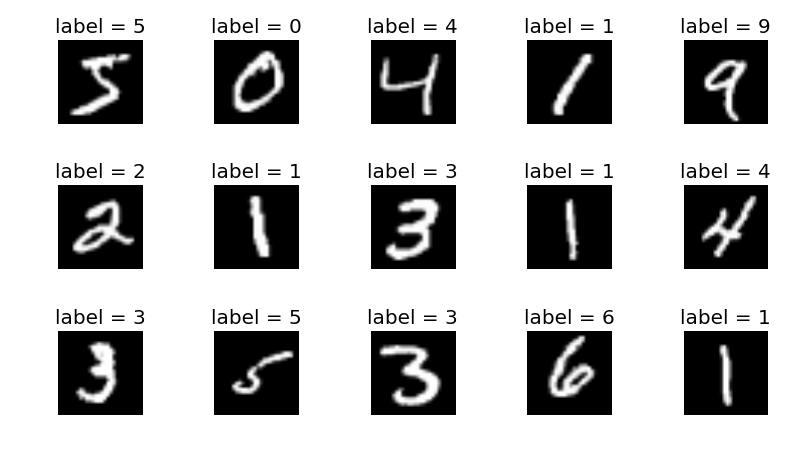

## 0. Preparación del entorno y comprobación de requisitos

In [2]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Información de versiones

In [3]:
tf.__version__

'2.15.0'

### Comprobar si disponemos de una GPU

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Inspeccionar los datos y crear subconjuntos train, test, validation

In [6]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
print(np.unique(y_train_full))

[0 1 2 3 4 5 6 7 8 9]


### Crear subconjunto de datos para validación

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,train_size=55000,shuffle=False)
print(X_train.shape)

(55000, 28, 28)


### Normalizar las entradas

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
# SOLUTION
X_train = X_train/255.
X_valid = X_valid/255.
X_test  = X_test/255.

### Examinar los datos

Clase:  5


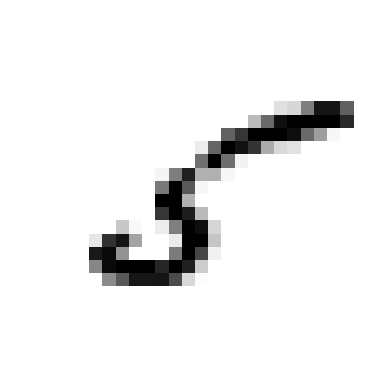

In [13]:
N = 11
plt.imshow(X_train[N], cmap="binary")
plt.axis('off')
print("Clase: ", y_train[N])

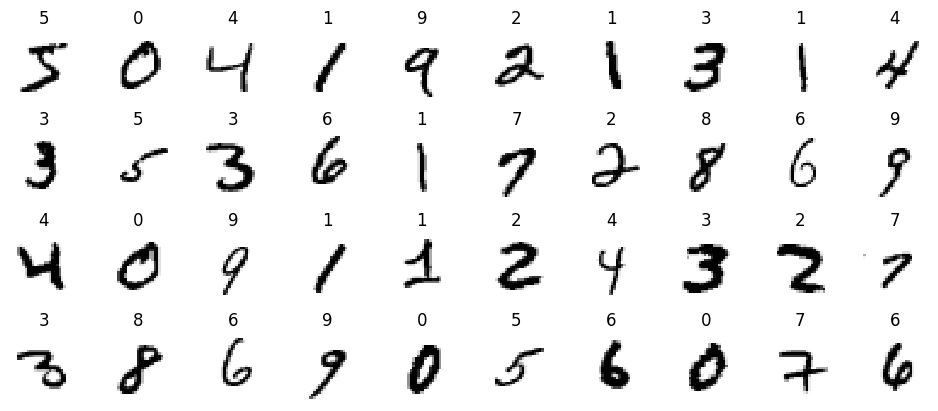

In [14]:
# PRIVATE
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2. Definir una red neuronal

#### Con una capa oculta (swallow network)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(784, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-08 07:09:35.308026: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 07:09:35.314186: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 07:09:35.315574: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 07:09:35.664876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 07:09:35.665435: I external/local_xla/xla/stream_executor

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## 3. Entrenar red neuronal

In [17]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15


2024-06-08 07:09:44.714033: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-08 07:09:44.857756: I external/local_xla/xla/service/service.cc:168] XLA service 0x9c1dab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-08 07:09:44.857791: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-06-08 07:09:44.883563: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


  12/1719 [..............................] - ETA: 8s - loss: 2.3579 - accuracy: 0.1146   

I0000 00:00:1717823384.928338    3657 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 7s 4ms/step - loss: 1.3151 - accuracy: 0.7136 - val_loss: 0.7060 - val_accuracy: 0.8754
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6391 - accuracy: 0.8512 - val_loss: 0.4523 - val_accuracy: 0.9026
Epoch 3/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4963 - accuracy: 0.8717 - val_loss: 0.3714 - val_accuracy: 0.9092
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4369 - accuracy: 0.8829 - val_loss: 0.3330 - val_accuracy: 0.9124
Epoch 5/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4035 - accuracy: 0.8876 - val_loss: 0.3094 - val_accuracy: 0.9178
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3820 - accuracy: 0.8929 - val_loss: 0.2945 - val_accuracy: 0.9180
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3667 - accuracy: 0.8963 - val_loss: 0.2832 - val_accuracy: 0.9202
Epo

#### Visualizando gráficamente la evolución del entrenamiento

In [18]:
pdhist = pd.DataFrame(history.history)

In [19]:
pdhist.head()

,loss,accuracy,val_loss,val_accuracy
0,1.315124,0.713564,0.706009,0.8754
1,0.639094,0.851236,0.452292,0.9026
2,0.496307,0.871727,0.371354,0.9092
3,0.436857,0.882855,0.332977,0.9124
4,0.403506,0.887618,0.309426,0.9178


Saving figure T01_mnist_simple_dnn


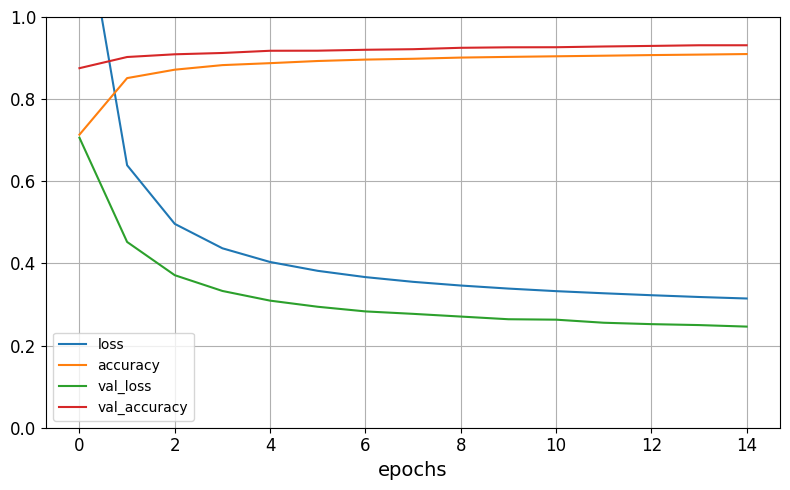

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("epochs")
save_fig("T01_mnist_simple_dnn")
plt.show()

## 3. Test

#### Midiendo el rendimiento con el set de test

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.9151


[0.2946881949901581, 0.9150999784469604]

#### Vamos a ver si la red acierta con algunos ejemplos del set de test

In [23]:
N = 50
X_new = X_test[N:N+5]
y_new = y_test[N:N+5]
print(y_new)

[6 3 5 5 6]


In [24]:
y_pred = model.predict(X_new)
print(y_pred.round(2))
print(np.argmax(y_pred,axis=-1))

1/1 [==============================] - 0s 64ms/step
[[0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.   0.   0.04 0.89 0.   0.   0.01 0.01]
 [0.   0.   0.   0.03 0.01 0.92 0.   0.   0.02 0.  ]
 [0.   0.   0.12 0.   0.   0.   0.86 0.   0.01 0.  ]]
[6 3 5 5 6]


## 4. Bonus: examinando los valores de los parámetros de la red entrenada

In [25]:
model.layers

In [27]:
for layer in model.layers:
    print(layer.name)

flatten
dense
dense_1


#### Capa de salida

In [29]:
output = model.layers[2]
weights, biases = output.get_weights()
print(weights.shape)
print(biases.shape)

(784, 10)
(10,)


In [31]:
print(biases)

[-0.00752563  0.00392344  0.0017293   0.00138584 -0.00670222  0.00322006
 -0.00032593  0.00734505  0.0006814  -0.00373126]


#### Capa oculta

In [32]:
hidden = model.layers[1]

In [33]:
weights, biases = hidden.get_weights()
print(weights.shape)
print(biases.shape)

(784, 784)
(784,)


In [34]:
weights

array([[ 0.03328464,  0.002771  , -0.0599365 , ..., -0.0168526 ,
        -0.04333846,  0.01775841],
       [ 0.00276665,  0.01976097, -0.03191517, ...,  0.02208045,
        -0.00048925, -0.03046067],
       [-0.02918211, -0.00997411, -0.01997776, ..., -0.03403991,
         0.02388401,  0.00351499],
       ...,
       [-0.04400148,  0.01782038, -0.01798415, ...,  0.0413334 ,
        -0.012868  , -0.03670172],
       [ 0.00133927, -0.04518087, -0.04218878, ...,  0.03606978,
        -0.02791405,  0.02798922],
       [ 0.04187216, -0.03950433, -0.04664488, ...,  0.00335514,
        -0.06121525, -0.00773551]], dtype=float32)

In [81]:
biases

array([ 5.80153009e-03, -1.12379165e-02, -2.03621923e-03, -1.64948485e-03,
        2.58600885e-05, -3.82976606e-03, -5.90380514e-03, -3.43640707e-03,
       -7.68917892e-03, -3.73227638e-03, -8.83260556e-03, -4.43378370e-03,
       -1.34104248e-02,  9.29672550e-03, -3.19481740e-04, -4.23880247e-03,
       -8.91273376e-04,  9.76853655e-04,  1.43509393e-03, -1.43376486e-02,
       -3.16813332e-03,  1.79888855e-04,  8.82375240e-03,  3.53153516e-03,
        4.25646175e-03,  3.46129062e-04, -2.14640587e-03, -4.04257281e-03,
       -1.28068659e-03,  1.15952855e-02,  1.54600921e-03,  8.57400987e-03,
       -1.04043481e-03,  7.61518162e-03,  3.20089329e-03, -1.06593585e-02,
        9.46687534e-03,  8.82649049e-03, -1.39585454e-02, -4.35474887e-03,
        1.54182804e-03, -2.04629470e-02,  4.33757436e-03, -2.79946579e-03,
       -7.32204862e-05, -1.36695127e-03,  4.17668652e-03, -2.01753667e-03,
       -1.07094049e-02,  3.17523198e-04,  4.45765257e-03,  4.86725103e-03,
       -2.90765823e-03, -